<a href="https://colab.research.google.com/github/TitasDas/PerigonAI/blob/main/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to solve the problem, please follow along in the notebook. In the next few sections we do the following.

**Data Loading and Exploration**
1. Load the dataset and inspect the first few rows.
2. Check for missing values.
3. Examine the data types of the columns.
4. Provide basic statistics for continuous columns and distribution counts for categorical columns.
5. Visualize some of the key distributions and relationships.


In [88]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

- (You may need to refresh this url or upload it to drive using the commented code)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Replace with your file path in Google Drive
# file_path = '/content/drive/My Drive/path_to_your_file.csv'
# data = pd.read_csv(file_path)
# data.head()


In [89]:
import pandas as pd

# Step 1: Load the data from github and inspect it
url = 'https://raw.githubusercontent.com/TitasDas/PerigonAI_Interview/main/10_01_train_dataset.csv?token=GHSAT0AAAAAACIWZUFRHCV5HBH5KIYKW56AZJFQ5TQ'
data = pd.read_csv(url)
#data = pd.read_csv('/mnt/data/10_01_train_dataset.csv')

# Display the first few rows of the dataset
data.head()

,day_count_0_25,day_count_0_5,day_count_0_75,day_count_1_0,day_count_2_0,day_count_3_0,day_count_4_0,pop_count_0_25,pop_count_0_5,pop_count_0_75,pop_count_1_0,pop_count_2_0,pop_count_3_0,pop_count_4_0,burger_0_25,burger_0_5,burger_0_75,burger_1_0,burger_2_0,burger_3_0,burger_4_0,other_0_25,other_0_5,other_0_75,other_1_0,other_2_0,other_3_0,other_4_0,pizza_0_25,pizza_0_5,pizza_0_75,pizza_1_0,pizza_2_0,pizza_3_0,pizza_4_0,org_retail_visits_0_25,org_retail_visits_0_5,org_retail_visits_0_75,org_retail_visits_1_0,org_retail_visits_2_0,org_retail_visits_3_0,org_retail_visits_4_0,unorg_retail_visits_0_25,unorg_retail_visits_0_5,unorg_retail_visits_0_75,unorg_retail_visits_1_0,unorg_retail_visits_2_0,unorg_retail_visits_3_0,unorg_retail_visits_4_0,High_0_25,High_0_5,High_0_75,High_1_0,High_2_0,High_3_0,High_4_0,Medium_0_25,Medium_0_5,Medium_0_75,Medium_1_0,Medium_2_0,Medium_3_0,Medium_4_0,Low_0_25,Low_0_5,Low_0_75,Low_1_0,Low_2_0,Low_3_0,Low_4_0,density_lvl_0_25,density_lvl_0_5,density_lvl_0_75,density_lvl_1_0,density_lvl_2_0,density_lvl_3_0,density_lvl_4_0,road_cnt_0_25,road_cnt_0_5,road_cnt_0_75,road_cnt_1_0,road_cnt_2_0,road_cnt_3_0,road_cnt_4_0,coffee_shop_0_25,coffee_shop_0_5,coffee_shop_0_75,coffee_shop_1_0,coffee_shop_2_0,coffee_shop_3_0,coffee_shop_4_0,fast_food_restaurant_0_25,fast_food_restaurant_0_5,fast_food_restaurant_0_75,fast_food_restaurant_1_0,fast_food_restaurant_2_0,fast_food_restaurant_3_0,fast_food_restaurant_4_0,ice_cream_shop_0_25,ice_cream_shop_0_5,ice_cream_shop_0_75,ice_cream_shop_1_0,ice_cream_shop_2_0,ice_cream_shop_3_0,ice_cream_shop_4_0,pizza_restaurant_0_25,pizza_restaurant_0_5,pizza_restaurant_0_75,pizza_restaurant_1_0,pizza_restaurant_2_0,pizza_restaurant_3_0,pizza_restaurant_4_0,restaurant_0_25,restaurant_0_5,restaurant_0_75,restaurant_1_0,restaurant_2_0,restaurant_3_0,restaurant_4_0,size,concept_type,city,region,target
0,590,2022,3720,6944,24673,48211,64642,564,2006,3565,6783,24054,46564,62504,1,2,2,3,4,12,13,0,0,0,0,0,1,1,1,1,1,1,2,7,8,0,0,0,0,12964,12964,37642,0,512,4695,12182,71787,308270,308270,0,0,0,0,0,0,0,9,36,70,120,406,813,1190,0,0,0,0,0,0,0,3.722222,3.166667,2.957143,3.183333,2.922105,2.799091,2.617372,79,260,497,807,2798,5666,7985,0,0,0,0,0,1,2,0,0,0,1,2,7,7,1,1,1,1,2,3,3,1,1,1,1,2,6,7,1,2,3,3,6,8,8,286.8573,IL,riyadh,riyadh_region,4888254.998
1,427,1120,1949,3410,11167,20545,35977,250,907,1725,3025,10375,19684,34746,4,4,5,6,10,10,13,0,0,0,0,0,0,1,0,0,0,1,4,4,5,307762,435082,435082,438899,500172,549748,580722,1105,4420,8421,32960,169415,301057,434087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.950000,2.472973,2.119048,2.214765,2.019348,1.975992,1.908105,35,118,219,369,1327,2511,4168,0,0,1,1,5,5,7,1,1,1,2,5,5,5,0,0,0,0,0,2,3,1,1,1,2,6,7,8,3,3,3,3,7,9,12,72.3200,FC,other,ḥail_province,2862160.623
2,532,2710,5176,10186,36727,68759,116027,539,2662,5099,10253,36994,69292,116550,0,0,1,2,9,10,26,0,0,0,0,0,0,1,1,1,4,4,5,5,8,0,0,0,0,0,27072,1717994,3172,3172,8234,28058,182025,384826,689711,0,0,0,0,0,0,3,2,16,36,70,291,581,883,6,22,42,75,275,700,1383,3.777778,3.576923,3.463415,3.360000,3.264605,3.193793,3.020382,103,291,630,1080,3691,7754,13846,1,1,2,2,2,4,5,0,0,0,0,2,2,12,0,0,1,1,4,4,8,2,2,4,4,6,6,11,1,1,2,2,8,11,18,196.9590,ILDT,dammam,eastern_province,4033007.517
3,682,2464,4089,7273,26611,42798,59421,682,2507,4093,7072,26192,41967,58323,0,0,0,0,4,14,14,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,632520,927748,18282,18282,25874,25874,101899,315596,479070,0,0,0,0,29,133,324,0,0,0,11,197,417,594,10,35,83,127,282,439,679,2.100000,2.228571,2.178571,2.269231,2.285336,2.210261,2.018275,85,274,536,915,3250,5526,8181,0,0,0,0,0,0,1,0,0,0,0,3,6,6,0,0,0,0,2,3,6,0,0,0,0,2,4,6,0,0,0,1,3,13,14,129.5000,ILDT,other,eastern_province,3683833.046
4,754,2155,4225,6657,25903,56247,109079,798,2225,4436,6958,26105,55766,109197,1,3,4,5,12,30,47,0,0,0,0,1,3,5,0,0,1,2,4,4,7,0,0,705,1410,152210,1737477,3616601,29578,63144,91884,120941,277981,500471,1047923,9,37,82,145,566,1191,1718,0,0,0,0,0,32,231,0,0,0,0,0,0,0,4.277778,3.98648

In [90]:
# Basic structure of the dataset
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Columns: 124 entries, day_count_0_25 to target
dtypes: float64(9), int64(112), object(3)
memory usage: 112.5+ KB


In [91]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

day_count_0_25    0
day_count_0_5     0
day_count_0_75    0
day_count_1_0     0
day_count_2_0     0
                 ..
size              0
concept_type      0
city              0
region            0
target            0
Length: 124, dtype: int64

In [92]:
# Obtain basic statistics of the dataset
data_description = data.describe()
data_description

,day_count_0_25,day_count_0_5,day_count_0_75,day_count_1_0,day_count_2_0,day_count_3_0,day_count_4_0,pop_count_0_25,pop_count_0_5,pop_count_0_75,pop_count_1_0,pop_count_2_0,pop_count_3_0,pop_count_4_0,burger_0_25,burger_0_5,burger_0_75,burger_1_0,burger_2_0,burger_3_0,burger_4_0,other_0_25,other_0_5,other_0_75,other_1_0,other_2_0,other_3_0,other_4_0,pizza_0_25,pizza_0_5,pizza_0_75,pizza_1_0,pizza_2_0,pizza_3_0,pizza_4_0,org_retail_visits_0_25,org_retail_visits_0_5,org_retail_visits_0_75,org_retail_visits_1_0,org_retail_visits_2_0,org_retail_visits_3_0,org_retail_visits_4_0,unorg_retail_visits_0_25,unorg_retail_visits_0_5,unorg_retail_visits_0_75,unorg_retail_visits_1_0,unorg_retail_visits_2_0,unorg_retail_visits_3_0,unorg_retail_visits_4_0,High_0_25,High_0_5,High_0_75,High_1_0,High_2_0,High_3_0,High_4_0,Medium_0_25,Medium_0_5,Medium_0_75,Medium_1_0,Medium_2_0,Medium_3_0,Medium_4_0,Low_0_25,Low_0_5,Low_0_75,Low_1_0,Low_2_0,Low_3_0,Low_4_0,density_lvl_0_25,density_lvl_0_5,density_lvl_0_75,density_lvl_1_0,density_lvl_2_0,density_lvl_3_0,density_lvl_4_0,road_cnt_0_25,road_cnt_0_5,road_cnt_0_75,road_cnt_1_0,road_cnt_2_0,road_cnt_3_0,road_cnt_4_0,coffee_shop_0_25,coffee_shop_0_5,coffee_shop_0_75,coffee_shop_1_0,coffee_shop_2_0,coffee_shop_3_0,coffee_shop_4_0,fast_food_restaurant_0_25,fast_food_restaurant_0_5,fast_food_restaurant_0_75,fast_food_restaurant_1_0,fast_food_restaurant_2_0,fast_food_restaurant_3_0,fast_food_restaurant_4_0,ice_cream_shop_0_25,ice_cream_shop_0_5,ice_cream_shop_0_75,ice_cream_shop_1_0,ice_cream_shop_2_0,ice_cream_shop_3_0,ice_cream_shop_4_0,pizza_restaurant_0_25,pizza_restaurant_0_5,pizza_restaurant_0_75,pizza_restaurant_1_0,pizza_restaurant_2_0,pizza_restaurant_3_0,pizza_restaurant_4_0,restaurant_0_25,restaurant_0_5,restaurant_0_75,restaurant_1_0,restaurant_2_0,restaurant_3_0,restaurant_4_0,size,target
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.00000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,116.000000,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,1.160000e+02,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.00000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,1.160000e+02
mean,618.706897,2009.068966,3978.353448,6878.836207,24626.267241,50910.732759,85378.586207,570.646552,2004.422414,4028.974138,6989.258621,25051.767241,51830.051724,87027.87069,1.456897,2.275862,2.672414,3.327586,6.913793,13.629310,22.422414,0.163793,0.284483,0.327586,0.439655,1.077586,2.129310,3.344828,0.206897,0.405172,0.560345,0.818966,1.956897,3.715517,6.137931,1.293500e+05,2.631693e+05,2.963844e+05,3.353328e+05,5.173510e+05,9.087904e+05,1.418366e+06,18452.241379,3.367737e+04,5.325312e+04,8.049363e+04,2.167018e+05,4.181798e+05,7.182564e+05,1.612069,6.948276,15.887931,28.336207,117.568966,254.689655,420.922414,2.120690,8.577586,18.982759,33.362069,125.129310,264.655172,453.801724,2.051724,8.551724,19.284483,33.560345,121.827586,267.431034,455.129310,3.209290,3.038256,2.95

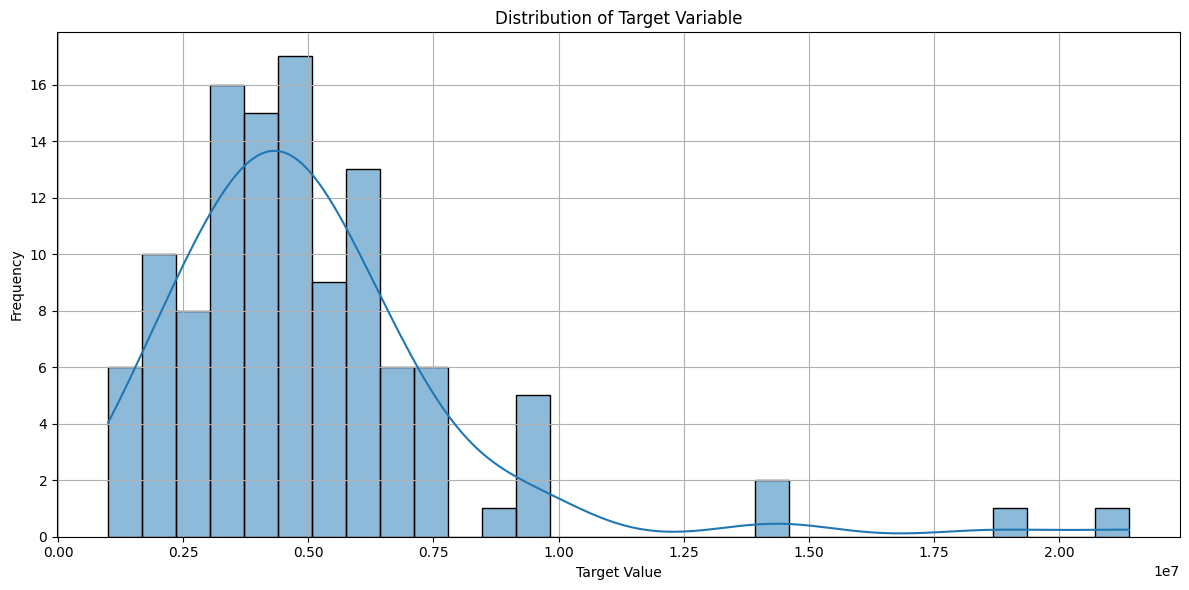

(None,
 Series([], dtype: int64),
        day_count_0_25  day_count_0_5  day_count_0_75  day_count_1_0  \
 count      116.000000     116.000000      116.000000     116.000000   
 mean       618.706897    2009.068966     3978.353448    6878.836207   
 std        883.654349    2566.328471     4106.963451    6536.804683   
 min         18.000000      27.000000       28.000000      31.000000   
 25%        239.000000     789.750000     1634.750000    2505.250000   
 50%        497.500000    1718.500000     3502.500000    6636.000000   
 75%        733.500000    2455.750000     5042.500000    8859.250000   
 max       9017.000000   25221.000000    36374.000000   52887.000000   
 
        day_count_2_0  day_count_3_0  day_count_4_0  pop_count_0_25  \
 count     116.000000     116.000000     116.000000      116.000000   
 mean    24626.267241   50910.732759   85378.586207      570.646552   
 std     19067.392975   38340.012034   63609.484005      993.258145   
 min        49.000000      60.00

In [93]:
#visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['target'], kde=True, bins=30)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

data_info, missing_values[missing_values > 0], data_description

Some key points to be noted from the above analysis -

1. No missing values found.
2. The summary statistics provide a glimpse of the range and distribution of values for each numerical column.
3. The distribution plot of the target variable shows a right-skewed distribution. There are a few values (potentially outliers) that have much higher values compared to the majority.


------------------------------------------------------------------------------------------

**Data Cleaning**

1. Remove duplicates
2. Transform categorical variables using appropriate encoding.

In [94]:
#remove duplicates
initial_rows = data.shape[0]
data = data.drop_duplicates()
rows_after_dropping = data.shape[0]

In [95]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['concept_type', 'city', 'region'], dtype='object')

In [96]:
# For simplicity, we will use one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [97]:
rows_dropped = initial_rows - rows_after_dropping
rows_dropped

0

In [98]:
data_encoded.head()

,day_count_0_25,day_count_0_5,day_count_0_75,day_count_1_0,day_count_2_0,day_count_3_0,day_count_4_0,pop_count_0_25,pop_count_0_5,pop_count_0_75,pop_count_1_0,pop_count_2_0,pop_count_3_0,pop_count_4_0,burger_0_25,burger_0_5,burger_0_75,burger_1_0,burger_2_0,burger_3_0,burger_4_0,other_0_25,other_0_5,other_0_75,other_1_0,other_2_0,other_3_0,other_4_0,pizza_0_25,pizza_0_5,pizza_0_75,pizza_1_0,pizza_2_0,pizza_3_0,pizza_4_0,org_retail_visits_0_25,org_retail_visits_0_5,org_retail_visits_0_75,org_retail_visits_1_0,org_retail_visits_2_0,org_retail_visits_3_0,org_retail_visits_4_0,unorg_retail_visits_0_25,unorg_retail_visits_0_5,unorg_retail_visits_0_75,unorg_retail_visits_1_0,unorg_retail_visits_2_0,unorg_retail_visits_3_0,unorg_retail_visits_4_0,High_0_25,High_0_5,High_0_75,High_1_0,High_2_0,High_3_0,High_4_0,Medium_0_25,Medium_0_5,Medium_0_75,Medium_1_0,Medium_2_0,Medium_3_0,Medium_4_0,Low_0_25,Low_0_5,Low_0_75,Low_1_0,Low_2_0,Low_3_0,Low_4_0,density_lvl_0_25,density_lvl_0_5,density_lvl_0_75,density_lvl_1_0,density_lvl_2_0,density_lvl_3_0,density_lvl_4_0,road_cnt_0_25,road_cnt_0_5,road_cnt_0_75,road_cnt_1_0,road_cnt_2_0,road_cnt_3_0,road_cnt_4_0,coffee_shop_0_25,coffee_shop_0_5,coffee_shop_0_75,coffee_shop_1_0,coffee_shop_2_0,coffee_shop_3_0,coffee_shop_4_0,fast_food_restaurant_0_25,fast_food_restaurant_0_5,fast_food_restaurant_0_75,fast_food_restaurant_1_0,fast_food_restaurant_2_0,fast_food_restaurant_3_0,fast_food_restaurant_4_0,ice_cream_shop_0_25,ice_cream_shop_0_5,ice_cream_shop_0_75,ice_cream_shop_1_0,ice_cream_shop_2_0,ice_cream_shop_3_0,ice_cream_shop_4_0,pizza_restaurant_0_25,pizza_restaurant_0_5,pizza_restaurant_0_75,pizza_restaurant_1_0,pizza_restaurant_2_0,pizza_restaurant_3_0,pizza_restaurant_4_0,restaurant_0_25,restaurant_0_5,restaurant_0_75,restaurant_1_0,restaurant_2_0,restaurant_3_0,restaurant_4_0,size,target,concept_type_FSDT,concept_type_IL,concept_type_ILDT,city_jeddah,city_khobar,city_madina,city_makkah,city_other,city_riyadh,region_asir_province,region_eastern_province,region_jazan_province,region_makkah_region,region_medina_province,region_riyadh_region,region_tabuk_province,region_ḥail_province
0,590,2022,3720,6944,24673,48211,64642,564,2006,3565,6783,24054,46564,62504,1,2,2,3,4,12,13,0,0,0,0,0,1,1,1,1,1,1,2,7,8,0,0,0,0,12964,12964,37642,0,512,4695,12182,71787,308270,308270,0,0,0,0,0,0,0,9,36,70,120,406,813,1190,0,0,0,0,0,0,0,3.722222,3.166667,2.957143,3.183333,2.922105,2.799091,2.617372,79,260,497,807,2798,5666,7985,0,0,0,0,0,1,2,0,0,0,1,2,7,7,1,1,1,1,2,3,3,1,1,1,1,2,6,7,1,2,3,3,6,8,8,286.8573,4888254.998,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,427,1120,1949,3410,11167,20545,35977,250,907,1725,3025,10375,19684,34746,4,4,5,6,10,10,13,0,0,0,0,0,0,1,0,0,0,1,4,4,5,307762,435082,435082,438899,500172,549748,580722,1105,4420,8421,32960,169415,301057,434087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.950000,2.472973,2.119048,2.214765,2.019348,1.975992,1.908105,35,118,219,369,1327,2511,4168,0,0,1,1,5,5,7,1,1,1,2,5,5,5,0,0,0,0,0,2,3,1,1,1,2,6,7,8,3,3,3,3,7,9,12,72.3200,2862160.623,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,532,2710,5176,10186,36727,68759,116027,539,2662,5099,10253,36994,69292,116550,0,0,1,2,9,10,26,0,0,0,0,0,0,1,1,1,4,4,5,5,8,0,0,0,0,0,27072,1717994,3172,3172,8234,28058,182025,384826,689711,0,0,0,0,0,0,3,2,16,36,70,291,581,883,6,22,42,75,275,700,1383,3.777778,3.576923,3.463415,3.360000,3.264605,3.193793,3.020382,103,291,630,1080,3691,7754,13846,1,1,2,2,2,4,5,0,0,0,0,2,2,12,0,0,1,1,4,4,8,2,2,4,4,6,6,11,1,1,2,2,8,11,18,196.9590,4033007.517,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,682,2464,4089,7273,26611,42798,59421,682,2507,4093,7072,26192,41967,58323,0,0,0,0,4,14,14,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,632520,927748,18282,18282,25874,25874,101899,315596,479070,0,0,0,0,29,133,324,0,0,0,11,197,417,594,10,35,83,127,282,439,679,2.100000,2.228571,2.178571,2.269231,2.285336,2.210261,2.018275,85,274,536,915,3250,5526,8181,0,0,0,0,0,0,1,0,0,0,0,3,6,6,0,0,0,0,2,3,6,0,0,0,0,2,4,6,0,0,0,1,3,13,14,129.5000,3683833.046,0,0,1,0,

------------------------------------------------------------------------------------------

**Feature Engineering**
1. Normalize/standardize continuous variables
2. Detect and Handle Outliers
3. Explore Potential Feature interactions or polynomial features.

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
# Normalize/Standardize Continuous Variables
# Excluding the target variable for standardization
features = data_encoded.drop("target", axis=1)
target = data_encoded["target"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)


In [101]:
# Detect and Handle Outliers
# For simplicity, we'll use the IQR method to detect and handle outliers for the target variable
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [102]:
# Filter the data to remove outliers in the target variable
filtered_data = scaled_data[(target >= lower_bound) & (target <= upper_bound)]
filtered_target = target[(target >= lower_bound) & (target <= upper_bound)]

filtered_data.shape, filtered_target.shape

((112, 137), (112,))

In the steps above -

1. **Normalization/Standardization** : The continuous variables have been standardized to have a mean of 0 and a standard deviation of 1.
2. **Outliers** : Using the IQR method, we detected and removed some outliers from the target variable. As a result, our dataset size has reduced slightly from 116 to 112 entries.

------------------------------------------------------------------------------------------

**Data Splitting**
1. We will split the dataset into training and testing sets. A common practice is to use a 70:30 or 80:20 split ratio.
2. The testing data will be used later to evaluate the model's performance.

In [103]:
from sklearn.model_selection import train_test_split

# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89, 137), (23, 137), (89,), (23,))

**Model Selection**
1. I'll start with a simple linear regression model as a baseline. This gives us a reference point for performance.
2. We'll try out more complex models to see if they offer improved performance over the baseline. Might give a random forest regressor a shot.

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = lr_model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

3629977.772159235

In [105]:
# RF regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_test)

# Calculate the RMSE for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rmse_rf

1636666.7139370325

In [106]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract the best hyperparameters from the Grid Search
best_params = grid_search.best_params_

best_params


Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

In [107]:
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf, r2_rf

# Initialize the Random Forest Regressor with the best hyperparameters
optimized_rf_model = RandomForestRegressor(n_estimators=150, min_samples_leaf=4,
                                           min_samples_split=2, max_depth=None, random_state=42)

# Train the optimized model on the training data
optimized_rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_optimized_rf = optimized_rf_model.predict(X_test)

# Calculate the RMSE for the optimized Random Forest
rmse_optimized_rf = np.sqrt(mean_squared_error(y_test, y_pred_optimized_rf))
r2_optimized_rf = r2_score(y_test, y_pred_optimized_rf)

rmse_optimized_rf, r2_optimized_rf


(1579793.9248202043, 0.2377066735136335)

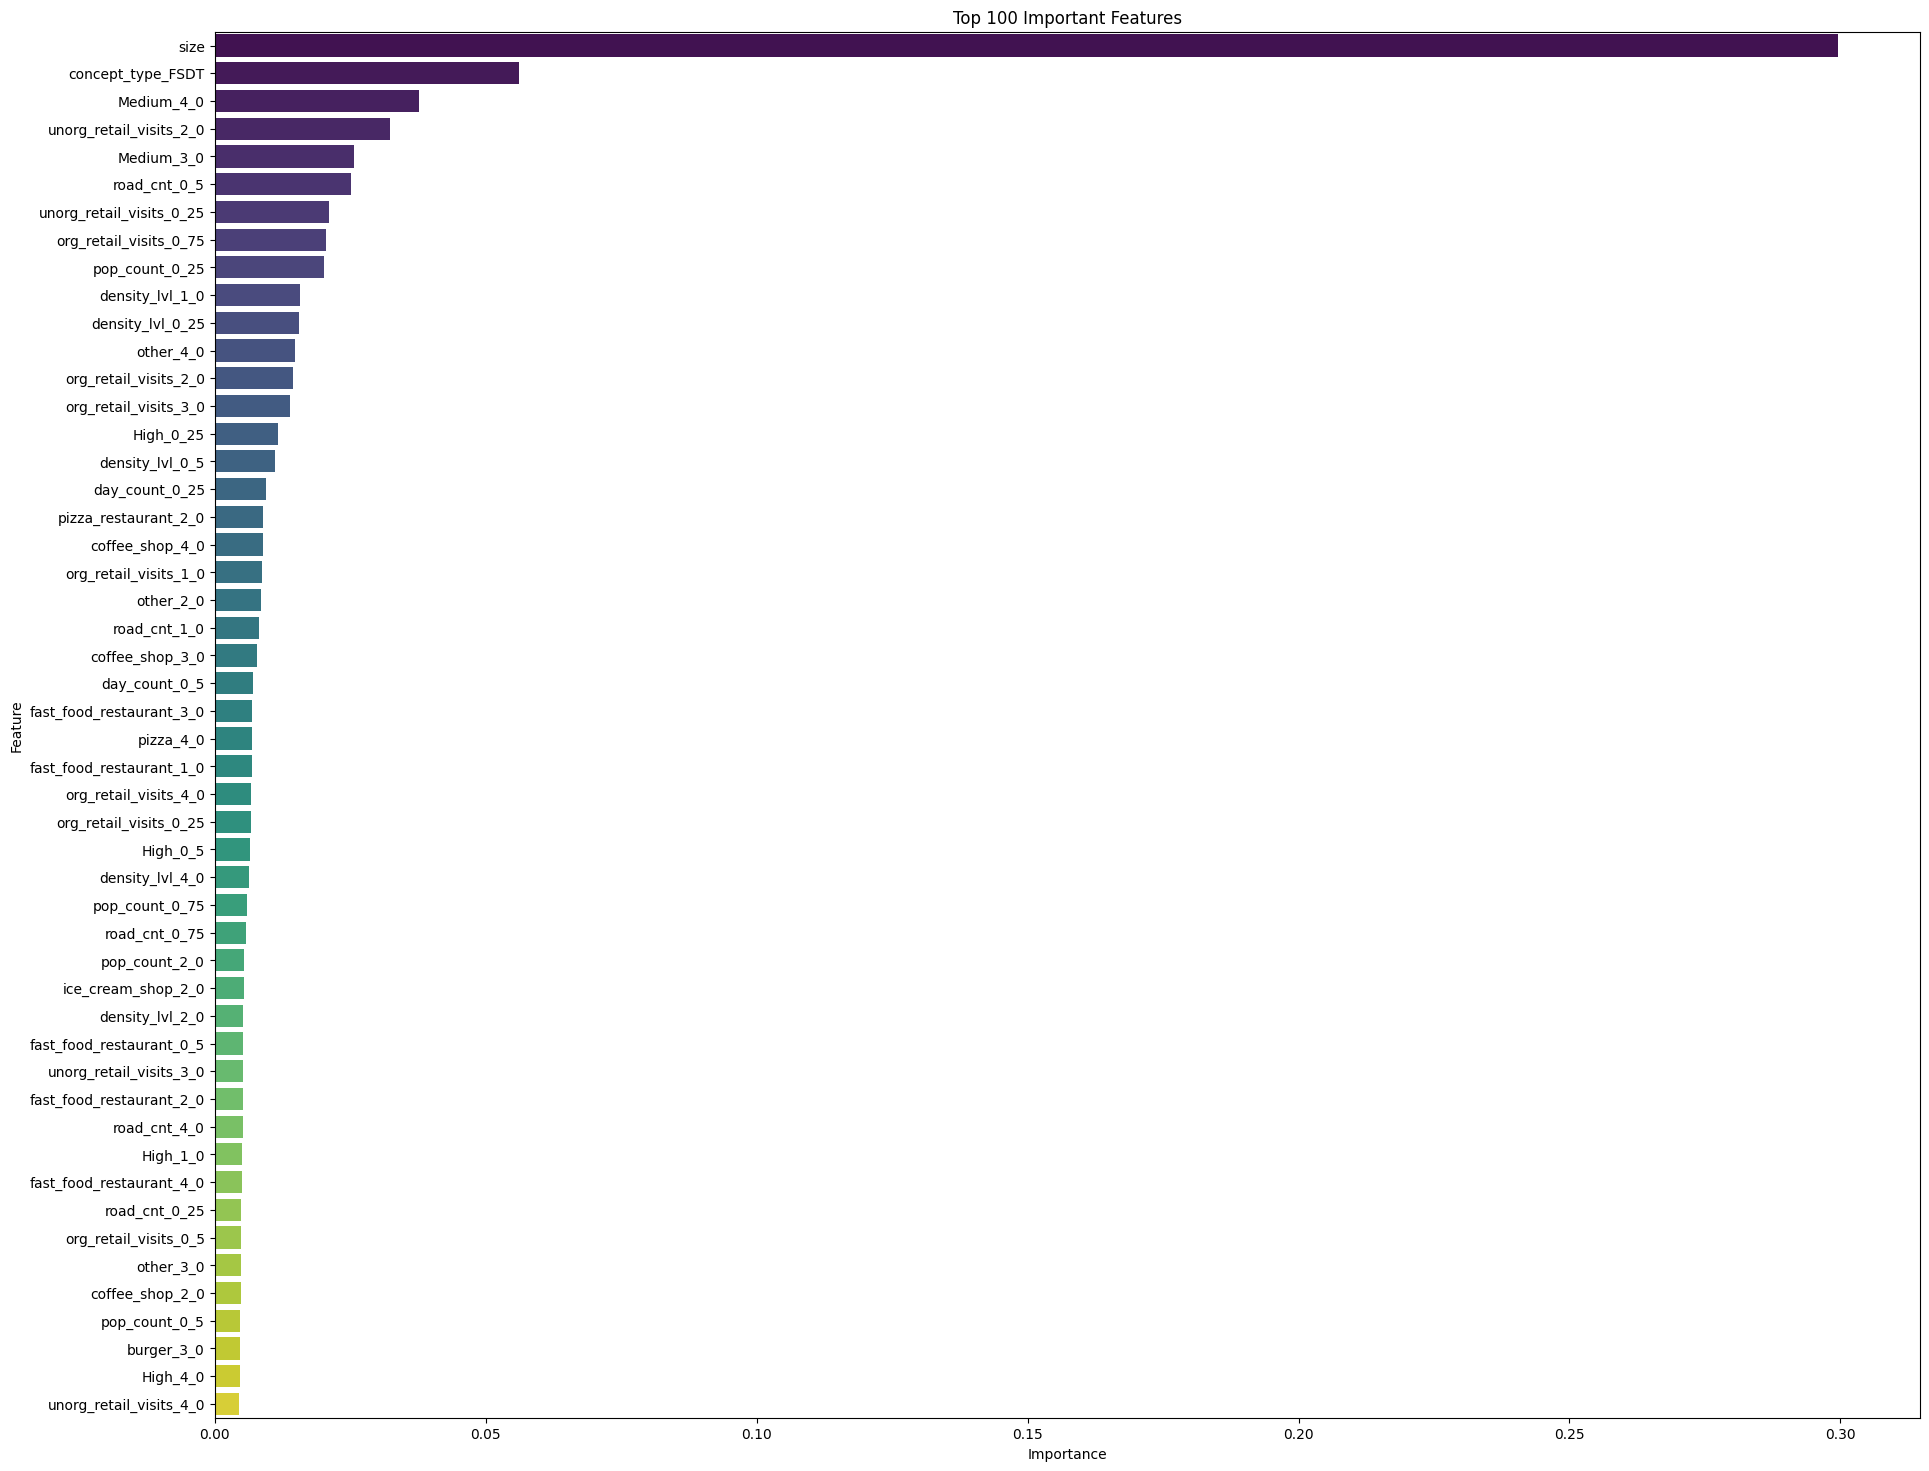

In [111]:
# Extract feature importances from the optimized Random Forest model
feature_importances = optimized_rf_model.feature_importances_

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': filtered_data.columns,
    'Importance': feature_importances
})

# Sort the features based on importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(22, 18))
sns.barplot(x='Importance', y='Feature', data=features_df.head(50), palette='viridis')
plt.title('Top 100 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [112]:
features_df

,Feature,Importance
119,size,0.299634
120,concept_type_FSDT,0.056184
62,Medium_4_0,0.037727
46,unorg_retail_visits_2_0,0.032273
61,Medium_3_0,0.025727
...,...,...
131,region_jazan_province,0.000000
85,coffee_shop_0_5,0.000000
63,Low_0_25,0.000000
135,region_tabuk_province,0.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(features_df, *['Importance'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(features_df, *['Importance'], **{})
chart